In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
sns.set()
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  *
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.applications import DenseNet121, VGG19, ResNet50

import PIL.Image
import matplotlib.pyplot as mpimg
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.preprocessing import image

from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

from sklearn.utils import shuffle

In [38]:
train_df = pd.read_csv('/content/drive/MyDrive/Rubbish/Chest_xray_Corona_Metadata.csv')
train_df.shape

(5910, 6)

In [39]:
train_df.head(5)

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


In [40]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5910 non-null   int64 
 1   X_ray_image_name        5910 non-null   object
 2   Label                   5910 non-null   object
 3   Dataset_type            5910 non-null   object
 4   Label_2_Virus_category  69 non-null     object
 5   Label_1_Virus_category  4334 non-null   object
dtypes: int64(1), object(5)
memory usage: 277.2+ KB


<Axes: >

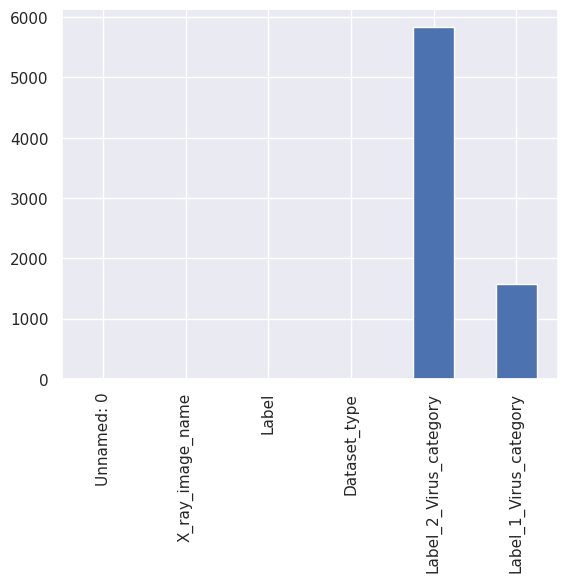

In [41]:
missing_vals = train_df.isnull().sum()
missing_vals.plot(kind = 'bar')

In [42]:
train_df.dropna(how = 'all')
train_df.isnull().sum()

,0
Unnamed: 0,0
X_ray_image_name,0
Label,0
Dataset_type,0
Label_2_Virus_category,5841
Label_1_Virus_category,1576


In [43]:
train_df.fillna('unknown', inplace=True)
train_df.isnull().sum()

,0
Unnamed: 0,0
X_ray_image_name,0
Label,0
Dataset_type,0
Label_2_Virus_category,0
Label_1_Virus_category,0


In [44]:
train_data = train_df[train_df['Dataset_type'] == 'TRAIN']
test_data = train_df[train_df['Dataset_type'] == 'TEST']
assert train_data.shape[0] + test_data.shape[0] == train_df.shape[0]
print(f"Shape of train data : {train_data.shape}")
print(f"Shape of test data : {test_data.shape}")
test_data.sample(10)

Shape of train data : (5286, 6)
Shape of test data : (624, 6)


,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5376,5399,NORMAL2-IM-0336-0001.jpeg,Normal,TEST,unknown,unknown
5700,5723,person103_bacteria_489.jpeg,Pnemonia,TEST,unknown,bacteria
5331,5354,IM-0099-0001.jpeg,Normal,TEST,unknown,unknown
5573,5596,person147_bacteria_705.jpeg,Pnemonia,TEST,unknown,bacteria
5512,5535,NORMAL2-IM-0346-0001.jpeg,Normal,TEST,unknown,unknown
5571,5594,person147_bacteria_707.jpeg,Pnemonia,TEST,unknown,bacteria
5325,5348,IM-0109-0001.jpeg,Normal,TEST,unknown,unknown
5609,5632,person134_bacteria_644.jpeg,Pnemonia,TEST,unknown,bacteria
5570,5593,person147_bacteria_711.jpeg,Pnemonia,TEST,unknown,bacteria
5581,5604,person143_bacteria_687.jpeg,Pnemonia,TEST,unknown,bacteria


In [45]:
print((train_df['Label_1_Virus_category']).value_counts())
print('--------------------------')
print((train_df['Label_2_Virus_category']).value_counts())


Label_1_Virus_category
bacteria          2777
unknown           1576
Virus             1555
Stress-Smoking       2
Name: count, dtype: int64
--------------------------
Label_2_Virus_category
unknown          5841
COVID-19           58
Streptococcus       5
SARS                4
ARDS                2
Name: count, dtype: int64


In [46]:
test_img_dir = '/content/drive/MyDrive/Rubbish/Covid19-dataset/test'
train_img_dir = '/content/drive/MyDrive/Rubbish/Covid19-dataset/train'

sample_train_images = list(os.walk(train_img_dir))[0][2][:8]
sample_train_images = list(map(lambda x: os.path.join(train_img_dir, x), sample_train_images))

sample_test_images = list(os.walk(test_img_dir))[0][2][:8]
sample_test_images = list(map(lambda x: os.path.join(test_img_dir, x), sample_test_images))
plt.figure(figsize = (10,10))
for iterator, filename in enumerate(sample_train_images):
    image = PIL.Image.open(filename)
    plt.subplot(4,2,iterator+1)
    plt.imshow(image, cmap=plt.cm.bone)

plt.tight_layout()


<Figure size 1000x1000 with 0 Axes>

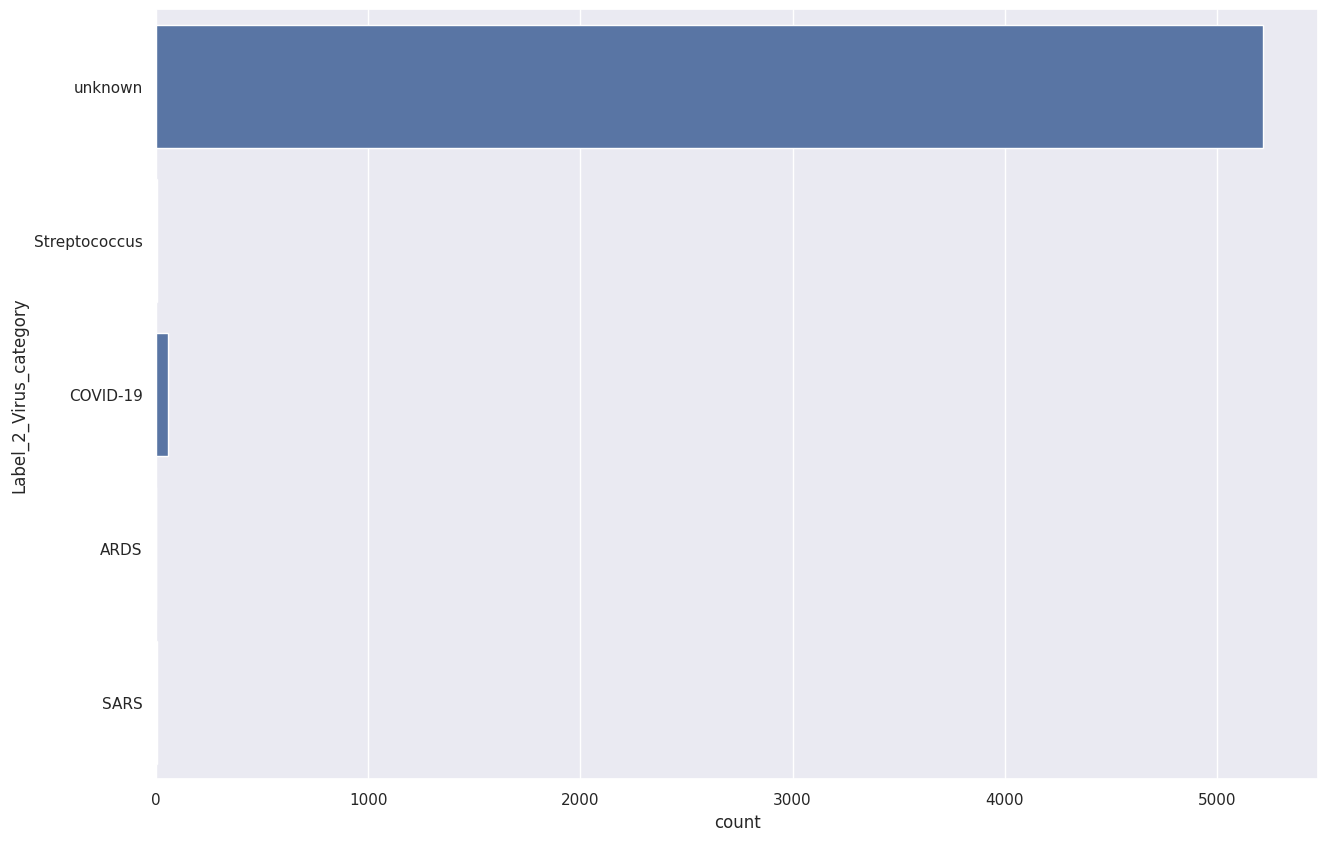

In [47]:
plt.figure(figsize=(15,10))
sns.countplot(train_data['Label_2_Virus_category']);

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Rubbish/Covid19-dataset/train/kjr-21-e25-g001-l-a.jpg'

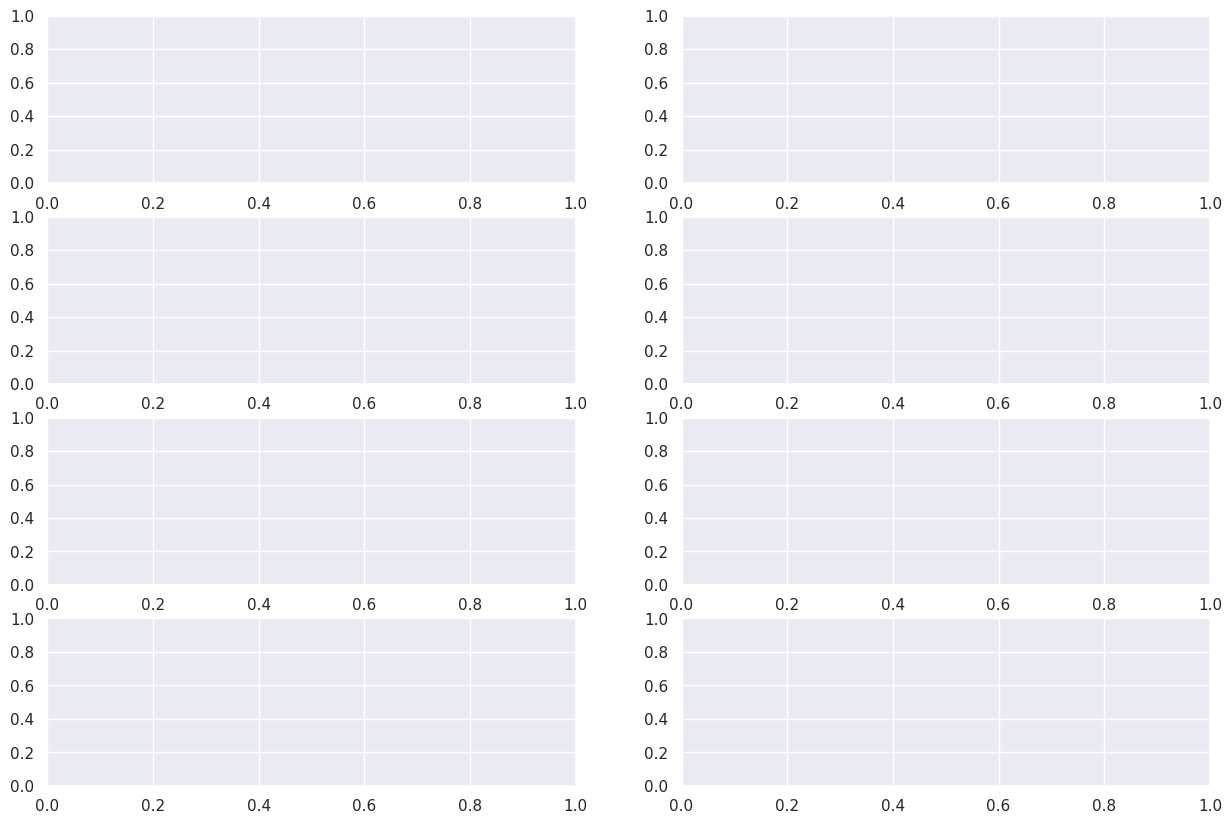

In [48]:
fig, ax = plt.subplots(4, 2, figsize=(15, 10))


covid_path = train_data[train_data['Label_2_Virus_category']=='COVID-19']['X_ray_image_name'].values

sample_covid_path = covid_path[:4]
sample_covid_path = list(map(lambda x: os.path.join(train_img_dir, x), sample_covid_path))

for row, file in enumerate(sample_covid_path):
    image = plt.imread(file)
    ax[row, 0].imshow(image, cmap=plt.cm.bone)
    ax[row, 1].hist(image.ravel(), 256, [0,256])
    ax[row, 0].axis('off')
    if row == 0:
        ax[row, 0].set_title('Images')
        ax[row, 1].set_title('Histograms')
fig.suptitle('Label 2 Virus Category = COVID-19', size=16)
plt.show()


In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(15, 10))


normal_path = train_data[train_data['Label']=='Normal']['X_ray_image_name'].values

sample_normal_path = normal_path[:4]
sample_normal_path = list(map(lambda x: os.path.join(train_img_dir, x), sample_normal_path))

for row, file in enumerate(sample_normal_path):
    image = plt.imread(file)
    ax[row, 0].imshow(image, cmap=plt.cm.bone)
    ax[row, 1].hist(image.ravel(), 256, [0,256])
    ax[row, 0].axis('off')
    if row == 0:
        ax[row, 0].set_title('Images')
        ax[row, 1].set_title('Histograms')
fig.suptitle('Label = NORMAL', size=16)
plt.show()

In [ ]:
final_train_data = train_data[(train_data['Label'] == 'Normal') |
                              ((train_data['Label'] == 'Pnemonia') &
                               (train_data['Label_2_Virus_category'] == 'COVID-19'))]
final_train_data['class'] = final_train_data.Label.apply(lambda x: 'negative' if x=='Normal' else 'positive')
test_data['class'] = test_data.Label.apply(lambda x: 'negative' if x=='Normal' else 'positive')

final_train_data['target'] = final_train_data.Label.apply(lambda x: 0 if x=='Normal' else 1)
test_data['target'] = test_data.Label.apply(lambda x: 0 if x=='Normal' else 1)
final_train_data = final_train_data[['X_ray_image_name', 'class', 'target', 'Label_2_Virus_category']]
final_test_data = test_data[['X_ray_image_name', 'class', 'target']]
test_data['Label'].value_counts()

In [ ]:
datagen =  ImageDataGenerator(
  shear_range=0.2,
  zoom_range=0.2,
)

def read_img(filename, size, path):
    img = image.load_img(os.path.join(path, filename), target_size=size)
    #convert image to array
    img = image.img_to_array(img) / 255
    return img
samp_img = read_img(final_train_data['X_ray_image_name'][0],
                                 (255,255),
                                 train_img_path)

plt.figure(figsize=(10,10))
plt.suptitle('Data Augmentation', fontsize=28)

i = 0


for batch in datagen.flow(tf.expand_dims(samp_img,0), batch_size=6):
    plt.subplot(3, 3, i+1)
    plt.grid(False)
    plt.imshow(batch.reshape(255, 255, 3));

    if i == 8:
        break
    i += 1

plt.show();

In [ ]:
corona_df = final_train_data[final_train_data['Label_2_Virus_category'] == 'COVID-19']
with_corona_augmented = []


def augment(name):
    img = read_img(name, (255,255), train_img_path)
    i = 0
    for batch in tqdm(datagen.flow(tf.expand_dims(img, 0), batch_size=32)):
        with_corona_augmented.append(tf.squeeze(batch).numpy())
        if i == 20:
            break
        i =i+1


corona_df['X_ray_image_name'].apply(augment)

In [ ]:
train_arrays = []
final_train_data['X_ray_image_name'].apply(lambda x: train_arrays.append(read_img(x, (255,255), train_img_dir)))
test_arrays = []
final_test_data['X_ray_image_name'].apply(lambda x: test_arrays.append(read_img(x, (255,255), test_img_dir)))
print(len(train_arrays))
print(len(test_arrays))

In [ ]:
y_train = np.concatenate((np.int64(final_train_data['target'].values), np.ones(len(with_corona_augmented), dtype=np.int64)))

In [ ]:
train_tensors = tf.convert_to_tensor(np.concatenate((np.array(train_arrays), np.array(with_corona_augmented))))
test_tensors  = tf.convert_to_tensor(np.array(test_arrays))
y_train_tensor = tf.convert_to_tensor(y_train)
y_test_tensor = tf.convert_to_tensor(final_test_data['target'].values)

train_dataset = tf.data.Dataset.from_tensor_slices((train_tensors, y_train_tensor))
test_dataset = tf.data.Dataset.from_tensor_slices((test_tensors, y_test_tensor))
for i,l in train_dataset.take(1):
    plt.imshow(i);

In [ ]:
BATCH_SIZE = 16
BUFFER = 1000

train_batches = train_dataset.shuffle(BUFFER).batch(BATCH_SIZE)
test_batches = test_dataset.batch(BATCH_SIZE)

for i,l in train_batches.take(1):
    print('Train Shape per Batch: ',i.shape);
for i,l in test_batches.take(1):
    print('Test Shape per Batch: ',i.shape);

In [ ]:
INPUT_SHAPE = (255,255,3)
base_model = tf.keras.applications.ResNet50(input_shape= INPUT_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
for i,l in train_batches.take(1):
    pass
base_model(i).shape
> TensorShape([16, 8, 8, 2048])

In [ ]:
model = Sequential()
model.add(base_model)
model.add(Layers.GlobalAveragePooling2D())
model.add(Layers.Dense(128))
model.add(Layers.Dropout(0.2))
model.add(Layers.Dense(1, activation = 'sigmoid'))
model.summary()

In [ ]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)


model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_batches, epochs=10, validation_data=test_batches, callbacks=[callbacks])

In [ ]:
pred = model.predict_classes(np.array(test_arrays))
# classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_data['target'], pred.flatten()))

In [ ]:
con_mat = confusion_matrix(test_data['target'], pred.flatten())
plt.figure(figsize = (10,10))
plt.title('CONFUSION MATRIX')
sns.heatmap(con_mat, cmap='cividis',
            yticklabels=['Negative', 'Positive'],
            xticklabels=['Negative', 'Positive'],
            annot=True);